In [1]:
# See env.yaml to configure your environment
import pandas as pd
import numpy as np
import matplotlib.markers
import datetime as dt
import matplotlib as plt

from sentiment_analysis_functions import *
from time_series_analysis_functions import *
from query_functions import *

from statsmodels.tsa.seasonal import seasonal_decompose
from kats.consts import TimeSeriesData

In [2]:
# Assumed to have already queried data from Twitter
df = pd.read_csv('1123_180000_to_1129_235959.csv', low_memory=False)
print(len(df), 'Tweets Pulled')
df.head()

143140 Tweets Pulled


,Unnamed: 0,author_id,created_at,text,conversation_id,in_reply_to_user_id,possibly_sensitive,public_metrics,source,referenced_tweets,...,verified,profile_image_url,name,description,protected,user_metrics,location,username,withheld_tweet,withheld_user
0,0,47237443,2022-11-29T23:59:58.000Z,@USMNT Thank you ♥️,1597740514669101056,7.563792e+06,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159774051466910...",...,False,https://pbs.twimg.com/profile_images/157805608...,seppy,"scientists, mother, freedom lover🙏proud American",False,"{'followers_count': 97, 'following_count': 444...",USA,sepidehp,NaN,NaN
1,1,1549657377762381824,2022-11-29T23:59:57.000Z,@VP @USMNT We are 100% accurate with trades he...,1597730649296850945,8.036942e+17,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,"[{'type': 'replied_to', 'id': '159773064929685...",...,False,https://pbs.twimg.com/profile_images/154965754...,JENNIFER'S,"INVESTORS MENTOR Manages Trade\nAccount💯, Fore...",False,"{'followers_count': 397, 'following_count': 40...",Russia,Jennife39377541,NaN,NaN
2,2,474678686,2022-11-29T23:59:57.000Z,@USSoccerpolitic @VP @USMNT She wasn't talking...,1597730649296850945,1.681379e+08,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter Web App,"[{'type': 'replied_to', 'id': '159773216784475...",...,False,https://pbs.twimg.com/profile_images/137076121...,TiredOfBeingTired🤦🏾‍♀️😤,The road to success is always under construction.,False,"{'followers_count': 1041, 'following_count': 2...",United States,krizzypowell,NaN,NaN
3,3,625700647,2022-11-29T23:59:57.000Z,"@Antonee_Jedi @USMNT Congratulations, and best...",1597731251599073280,3.764217e+08,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,"[{'type': 'replied_to', 'id': '159773125159907...",...,False,https://pbs.twimg.com/profile_images/142728933...,mainieac,NaN,False,"{'followers_count': 23, 'following_count': 156...",Maine,penobscotvalley,NaN,NaN
4,4,1330668367833931776,2022-11-29T23:59:56.000Z,@Rudofaux1 @AbedRahdar8LFC @USMNT Sweet dream ...,1597654990041907200,1.330229e+18,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159774087129819...",...,False,https://pbs.twimg.com/profile_images/159796510...,Ja,Chiefs • Depressed Buckeyes • Professional Age...,False,"{'followers_count': 935, 'following_count': 31...","St Louis, MO",WokeThuney,NaN,NaN


In [3]:
# Filter for tweets during USAvENG
USAvENG_tweets = df.loc[np.where((df.created_at > '2022-11-25T17:58:00.000Z') 
                                        & (df.created_at < '2022-11-25T22:00:00.000Z'))]
USAvENG_tweets = preprocess(USAvENG_tweets)
USAvENG_tweets.head()

,Unnamed: 0,author_id,created_at,text,conversation_id,in_reply_to_user_id,possibly_sensitive,public_metrics,source,referenced_tweets,...,name,description,protected,user_metrics,location,username,withheld_tweet,withheld_user,filtered_text,word_count
94907,94907,1479902869411274755,2022-11-25T21:59:43.000Z,@jackson_mnslp @MNBeer3 @USMNT @Visa In the gr...,1596245664815796224,7.725523e+17,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159624681611449...",...,S2,MSU Alum | Just some guy really | Lions accoun...,False,"{'followers_count': 480, 'following_count': 40...","East Lansing, MI",MSU_DS2,NaN,NaN,In the group stage there are draws. Once it g...,18
94940,94940,870935523602386945,2022-11-25T21:59:23.000Z,@apk1194 @jakerobbo05 @furthertundra2 @PadresE...,1596199680089939969,4.806773e+08,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159626022729209...",...,Josh 💎 🏴󠁧󠁢󠁥󠁮󠁧󠁿 for WC,Darwizzy Admirer. Was Fabio28Carvalho,False,"{'followers_count': 6559, 'following_count': 2...",NaN,Dxrwizzy27,NaN,NaN,we couldnt score and youre still going out of...,16
94961,94961,1539419053403492353,2022-11-25T21:59:59.000Z,@LeftHookLarrry @USMNT @England How cute 😂,1596248707733020672,1.539419e+18,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159626238074009...",...,🇺🇸 NOT Hacksaw Jim Duggan 🇺🇸,I am NOT the real hacksaw Jim Dugan. I’m on he...,False,"{'followers_count': 205, 'following_count': 59...",NaN,IllBGud123,NaN,NaN,How cute,4
94962,94962,1539419053403492353,2022-11-25T21:59:43.000Z,@LeftHookLarrry @USMNT @England And you think ...,1596248707733020672,1.565698e+18,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159625702766321...",...,🇺🇸 NOT Hacksaw Jim Duggan 🇺🇸,I am NOT the real hacksaw Jim Dugan. I’m on he...,False,"{'followers_count': 205, 'following_count': 59...",NaN,IllBGud123,NaN,NaN,And you think ManU is trying to get more foll...,12
94963,94963,1529832528114221057,2022-11-25T21:59:59.000Z,@USMNT @England HELL NAHHHHHH ITS SOCCER https...,1596248707733020672,7.563792e+06,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159624870773302...",...,Ian,NaN,False,"{'followers_count': 136, 'following_count': 36...",NaN,gill03_ian,NaN,NaN,HELL NAHHHHHH ITS SOCCER,6


In [4]:
# See tweet distribution
USAvENG_tweets['word_count'].describe()

count    31479.000000
mean        13.248038
std         10.391423
min          1.000000
25%          6.000000
50%         10.000000
75%         17.000000
max         61.000000
Name: word_count, dtype: float64

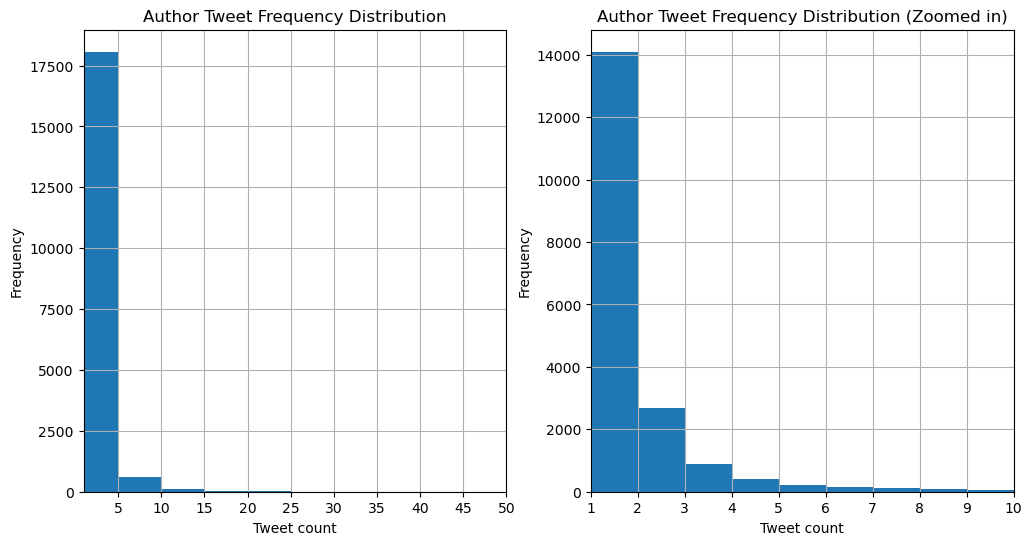

In [5]:
get_author_hist(USAvENG_tweets, 11)

In [6]:
# Run VADER algorithm to calculate and classify sentiment
USAvENG_tweets = run_vader(USAvENG_tweets)
USAvENG_tweets.head()

,Unnamed: 0,author_id,created_at,text,conversation_id,in_reply_to_user_id,possibly_sensitive,public_metrics,source,referenced_tweets,...,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,sentiment_compound_polarity_f,sentiment_neutral_f,sentiment_negative_f,sentiment_pos_f,sentiment_type_f
94907,94907,1479902869411274755,2022-11-25T21:59:43.000Z,@jackson_mnslp @MNBeer3 @USMNT @Visa In the gr...,1596245664815796224,7.725523e+17,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159624681611449...",...,0.0000,1.000,0.000,0.000,NEUTRAL,0.0000,1.000,0.000,0.00,NEUTRAL
94940,94940,870935523602386945,2022-11-25T21:59:23.000Z,@apk1194 @jakerobbo05 @furthertundra2 @PadresE...,1596199680089939969,4.806773e+08,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159626022729209...",...,0.0000,1.000,0.000,0.000,NEUTRAL,0.0000,1.000,0.000,0.00,NEUTRAL
94961,94961,1539419053403492353,2022-11-25T21:59:59.000Z,@LeftHookLarrry @USMNT @England How cute 😂,1596248707733020672,1.539419e+18,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159626238074009...",...,0.4588,0.571,0.000,0.429,POSITIVE,0.4588,0.250,0.000,0.75,POSITIVE
94962,94962,1539419053403492353,2022-11-25T21:59:43.000Z,@LeftHookLarrry @USMNT @England And you think ...,1596248707733020672,1.565698e+18,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159625702766321...",...,0.0000,1.000,0.000,0.000,NEUTRAL,0.0000,1.000,0.000,0.00,NEUTRAL
94963,94963,1529832528114221057,2022-11-25T21:59:59.000Z,@USMNT @England HELL NAHHHHHH ITS SOCCER https...,1596248707733020672,7.563792e+06,False,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Twitter for iPhone,"[{'type': 'replied_to', 'id': '159624870773302...",...,-0.7456,0.529,0.471,0.000,NEGATIVE,-0.6808,0.395,0.605,0.00,NEGATIVE


In [7]:
# Find effects of VADER performance on processed text
mismatches(USAvENG_tweets)

,raw,filtered,filtered_change
POSITIVE,444,351,-93
NEUTRAL,266,106,-160
NEGATIVE,242,495,253


In [8]:
# Find average magnitude of effects from processed text
(USAvENG_tweets['sentiment_compound_polarity_f'] - USAvENG_tweets['sentiment_compound_polarity']).abs().mean()

0.02726361701451762

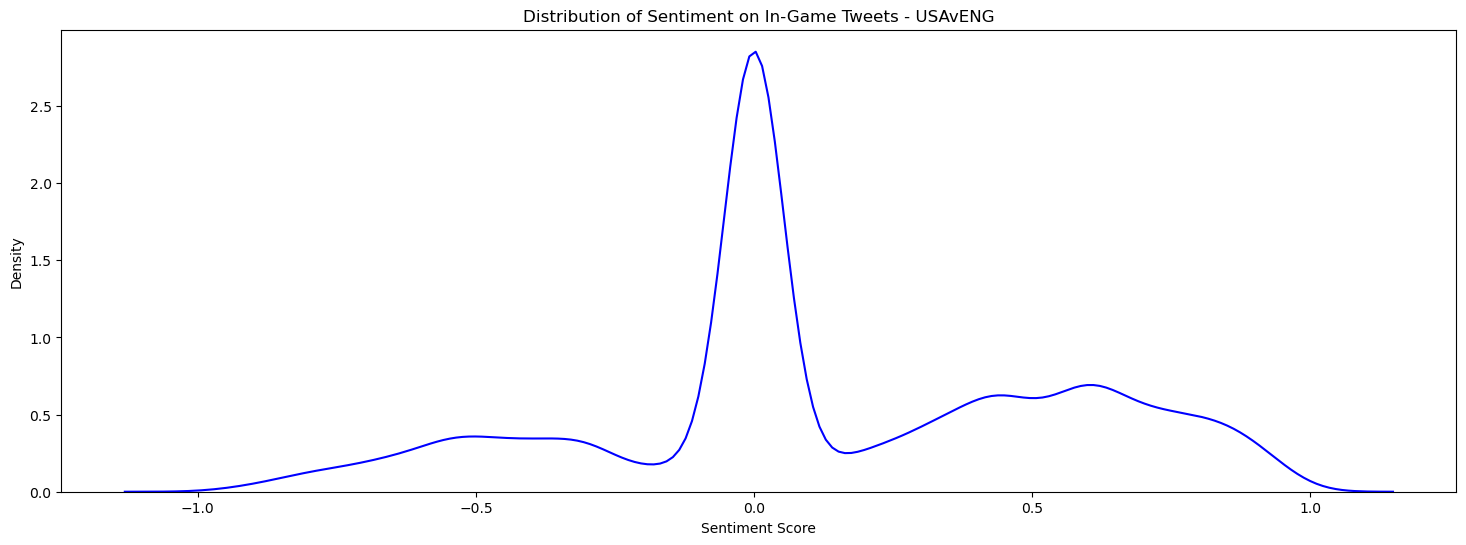

c:\Users\willc\anaconda3\envs\kats_test\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9481309652328491, pvalue=0.0)

In [9]:
# See distribution of tweet sentiment
get_dist(USAvENG_tweets['sentiment_compound_polarity_f'], 'USAvENG')

In [10]:
# See distribution by classification type
USAvENG_tweets[['sentiment_type_f', 'sentiment_compound_polarity_f']].groupby('sentiment_type_f').describe()

sentiment_compound_polarity_f                              \
                                         count      mean       std     min   
sentiment_type_f                                                             
NEGATIVE                                6545.0 -0.446949  0.210641 -0.9719   
NEUTRAL                                11478.0  0.000000  0.000000  0.0000   
POSITIVE                               13456.0  0.539780  0.224422  0.0015   

                                                  
                     25%     50%     75%     max  
sentiment_type_f                                  
NEGATIVE         -0.5911 -0.4482 -0.2960 -0.0015  
NEUTRAL           0.0000  0.0000  0.0000  0.0000  
POSITIVE          0.3818  0.5574  0.7156  0.9894

In [11]:
# Get extremely positive & extremely negative sentiment tweets for word cloud
extreme_positive = USAvENG_tweets[USAvENG_tweets['sentiment_compound_polarity_f']
                            >=np.percentile(USAvENG_tweets['sentiment_compound_polarity_f'], 95)]
extreme_negative = USAvENG_tweets[USAvENG_tweets['sentiment_compound_polarity_f']
                            <=np.percentile(USAvENG_tweets['sentiment_compound_polarity_f'], 5)]

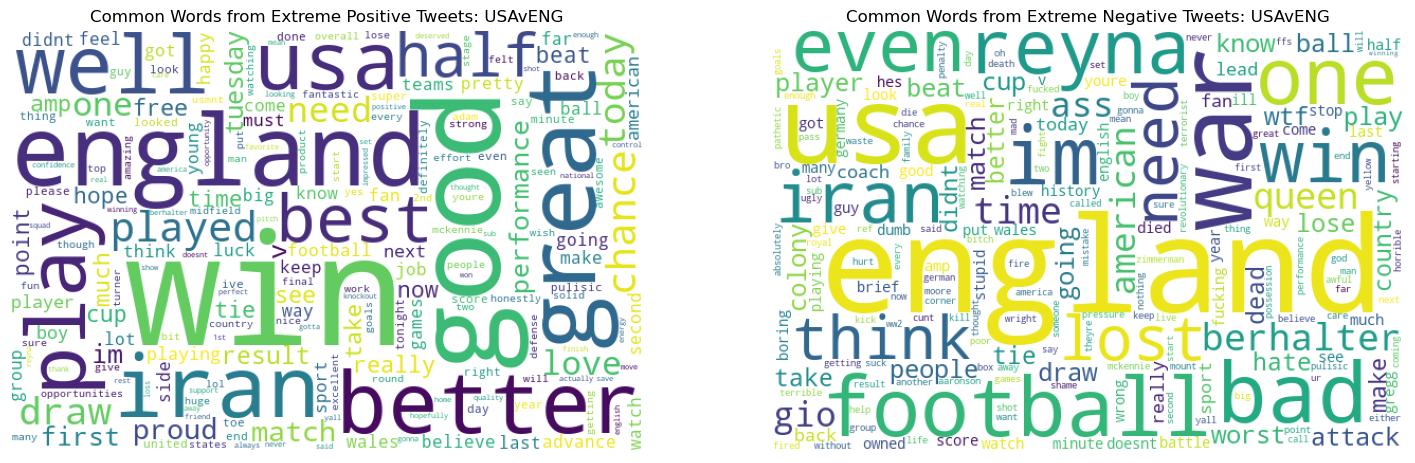

In [12]:
# Render viz of extremely positive & extremely negative sentiment tweets
create_word_cloud(extreme_positive['filtered_text'], extreme_negative['filtered_text'], 'USAvENG', True,
                    ['team', 'goal', 'world', 'game', 'soccer', 'fuck', 'shit', 'thats', 
                   'still', 'dont', 'us', 'im' 'ass', 'damn', 'u', 'hell', 
                   'let', 'lets', 'go', 'cant'])

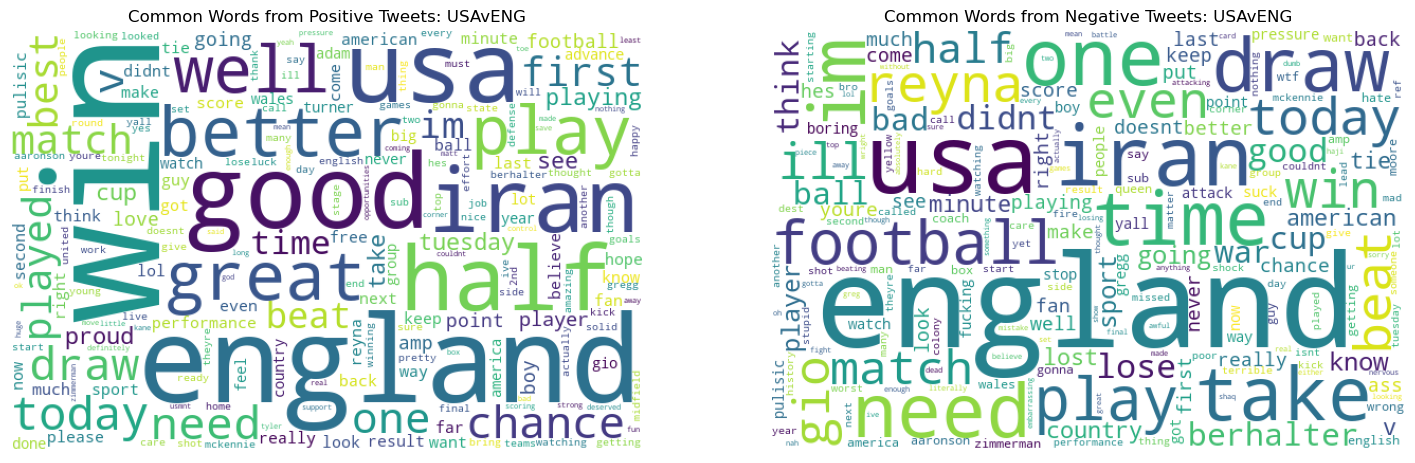

In [13]:
# Render viz for all positive and negative tweets
positive = USAvENG_tweets[USAvENG_tweets['sentiment_compound_polarity_f']>0]
negative = USAvENG_tweets[USAvENG_tweets['sentiment_compound_polarity_f']<0]

create_word_cloud(positive['filtered_text'], negative['filtered_text'], 'USAvENG', False, 
                    ['team', 'goal', 'world', 'game', 'soccer', 'fuck', 'shit', 'thats', 
                   'still', 'dont', 'us', 'im' 'ass', 'damn', 'u', 'hell', 
                   'let', 'lets', 'go', 'cant'])

In [14]:
# Split the string of tweet to remove the seconds, convert to a datetime column
USAvENG_tweets.created_at = pd.to_datetime(USAvENG_tweets.created_at).dt.strftime('%Y-%m-%d %H:%M')

# Get tweet counts by minute
tweets_m = USAvENG_tweets.groupby('created_at').count()['id']

# Ensure the created_at field is still a datetime after grouping calculations
tweets_m.index = pd.DatetimeIndex(tweets_m.index)

# See distribution
tweets_m.describe()

count     242.000000
mean      130.078512
std       110.388441
min        41.000000
25%        83.000000
50%        98.000000
75%       129.750000
max      1009.000000
Name: id, dtype: float64

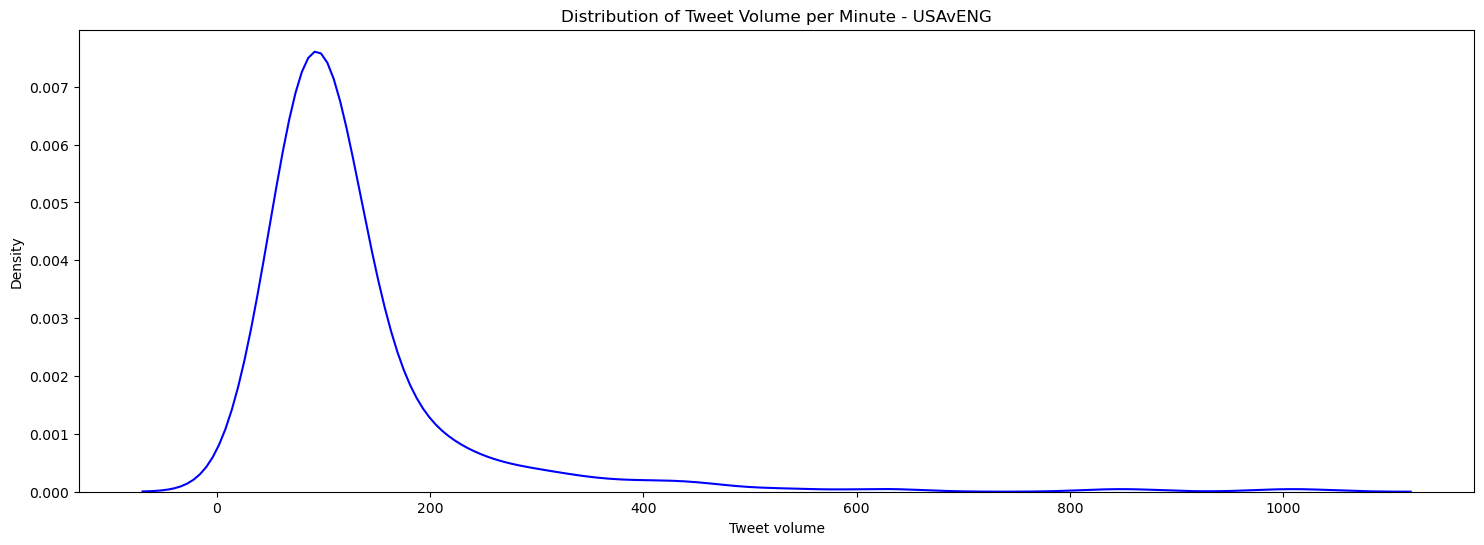

ShapiroResult(statistic=0.5485985279083252, pvalue=1.4044642898283328e-24)

In [15]:
# See distribution of tweets per minute
get_dist_vol(tweets_m, 'USAvENG')

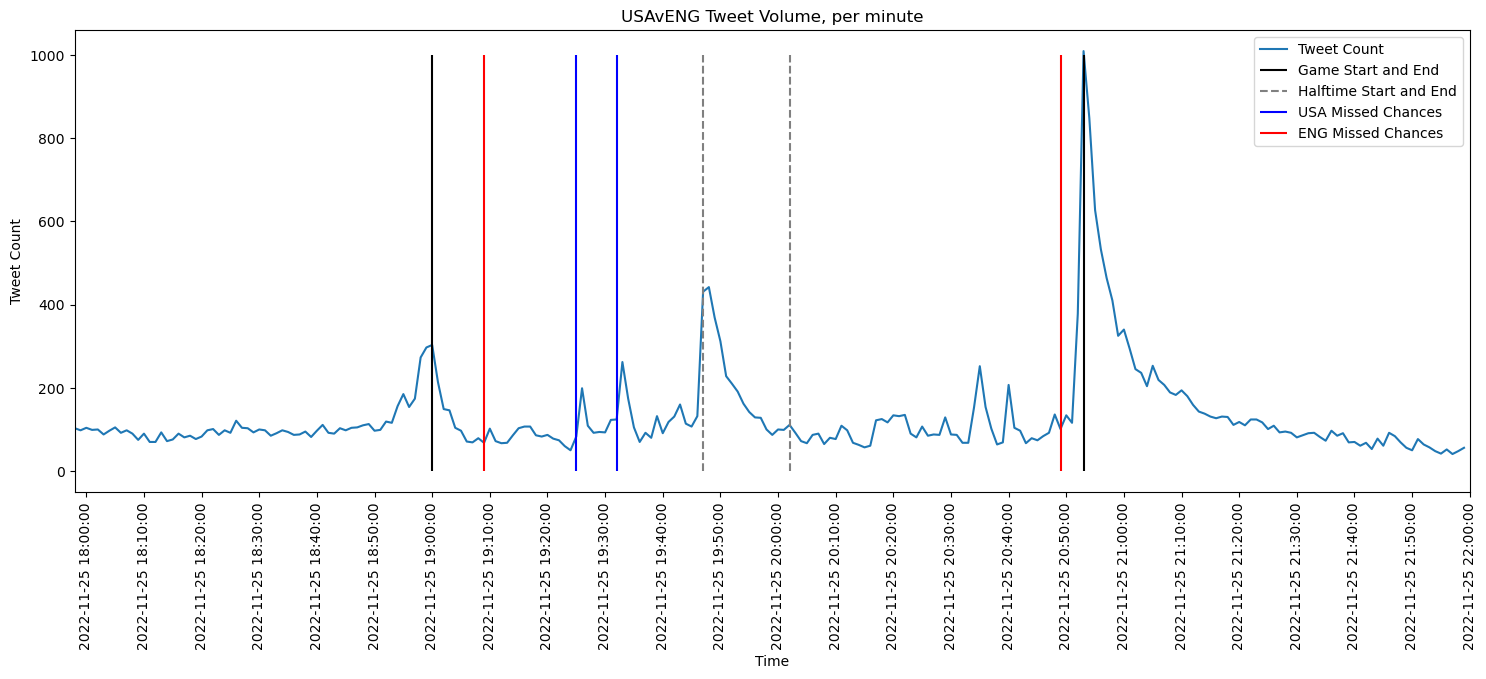

In [16]:
# Generate time series chart of tweet volume
fig, ax = plt.subplots(figsize = (18, 6))

# Set line chart, axes ticks per 10 minutes
tweets_m.plot.line(ax = ax, y='id', title='USAvENG Tweet Volume, per minute', label='Tweet Count')
ax.set_xticks(pd.date_range(start='2022-11-25 18:00', end ='2022-11-25 22:00', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-11-25 18:00', end ='2022-11-25 22:00', freq='10min'), rotation = 90)

# Plot black lines for the game start and end, dotted lines for halftime, red lines for English missed chances, and blue lines for American missed chances
ax.set_xlabel('Time')
ax.set_ylabel('Tweet Count')
ax.vlines(x = ['2022-11-25 19:00:00', '2022-11-25 20:53:00'], ymin = 0, ymax = 1000, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-11-25 19:47:00', '2022-11-25 20:02:00'], ymin = 0, ymax = 1000, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = ['2022-11-25 19:25:00', '2022-11-25 19:32:00'], ymin = 0, ymax = 1000, color = 'blue', label = 'USA Missed Chances')
ax.vlines(x = ['2022-11-25 19:09:00', '2022-11-25 20:49:00'], ymin = 0, ymax = 1000, color = 'red', label = 'ENG Missed Chances')
ax.legend();

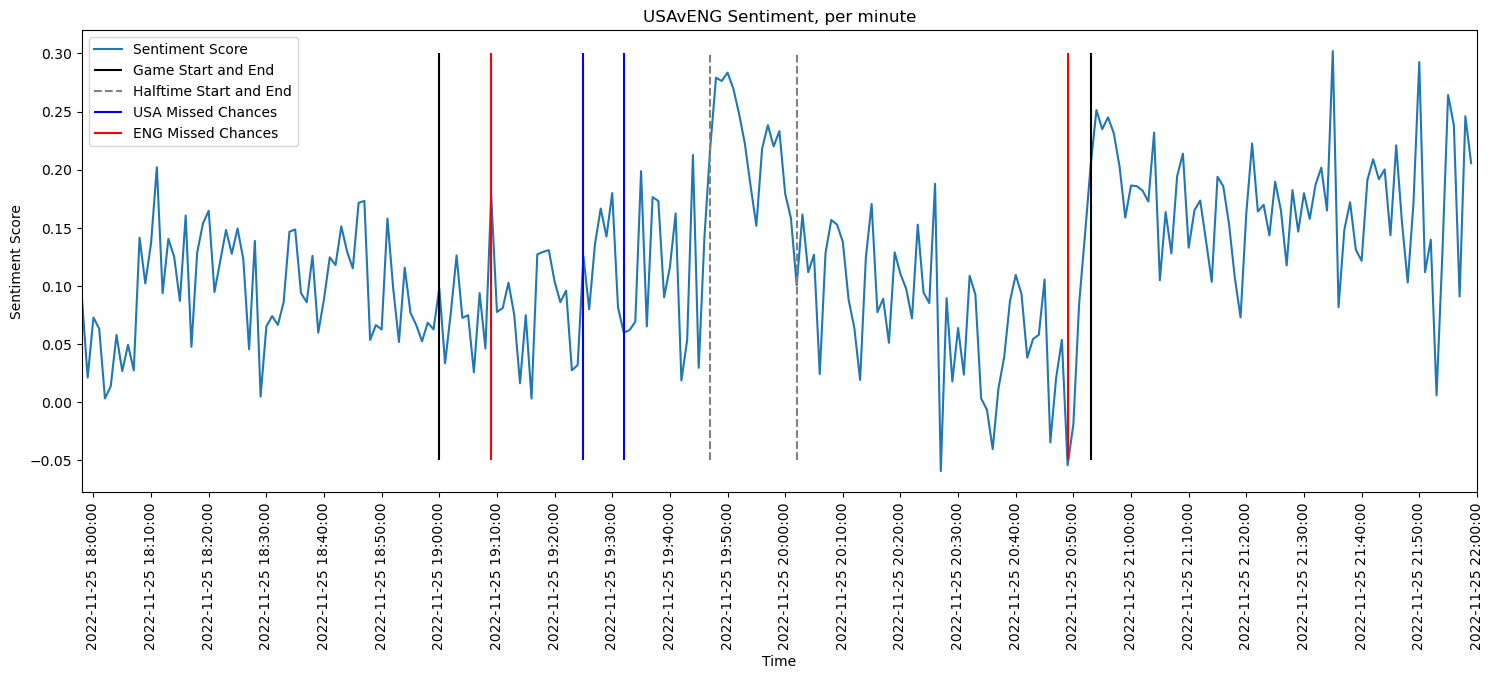

In [17]:
# Replicate time series chart for sentiment
fig, ax = plt.subplots(figsize = (18, 6))

USAvENG_tweets_m = USAvENG_tweets.groupby('created_at').agg({'sentiment_compound_polarity_f': 'mean'})
USAvENG_tweets_m.index = pd.DatetimeIndex(USAvENG_tweets_m.index)
USAvENG_tweets_m.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                            title='USAvENG Sentiment, per minute', label='Sentiment Score')

# Set axes
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-11-25 18:00', end ='2022-11-25 22:00', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-11-25 18:00', end ='2022-11-25 22:00', freq='10min'), rotation = 90)

# # Plot black lines for the game start and end, dotted lines for halftime, red lines for English missed chances, and blue lines for American missed chances
ax.vlines(x = ['2022-11-25 19:00:00', '2022-11-25 20:53:00'], ymin = -0.05, ymax = 0.3, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-11-25 19:47:00', '2022-11-25 20:02:00'], ymin = -0.05, ymax = 0.3, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = ['2022-11-25 19:25:00', '2022-11-25 19:32:00'], ymin = -0.05, ymax = 0.3, color = 'blue', label = 'USA Missed Chances')
ax.vlines(x = ['2022-11-25 19:09:00', '2022-11-25 20:49:00'], ymin = -0.05, ymax = 0.3, color = 'red', label = 'ENG Missed Chances')
ax.legend();

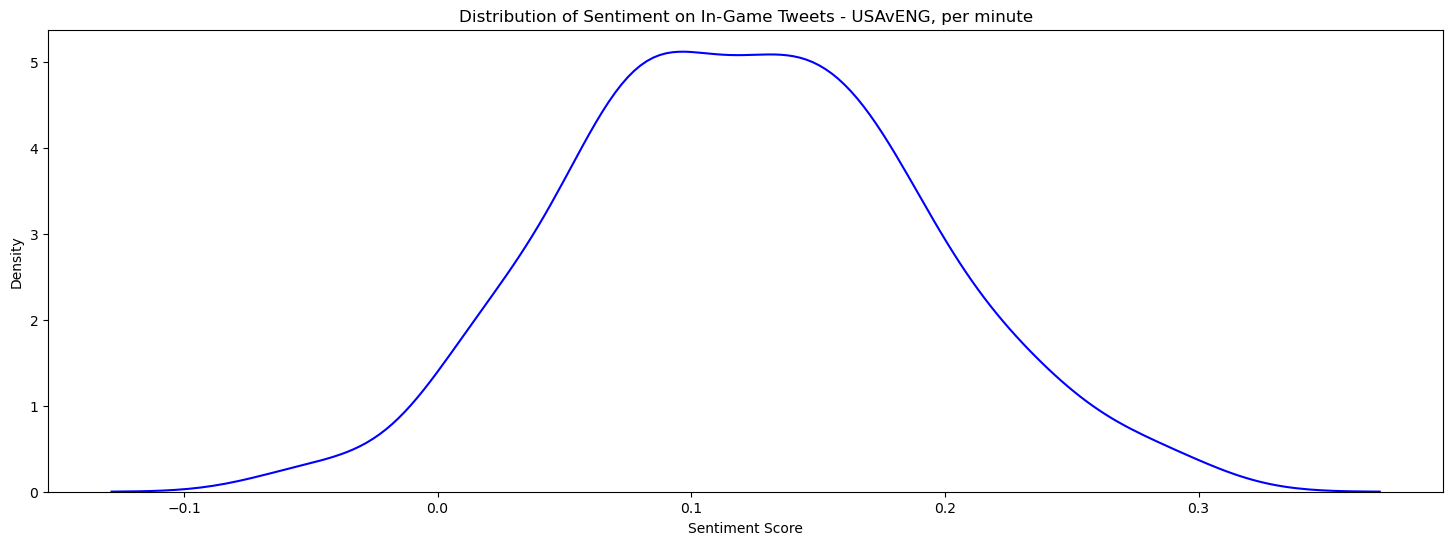

ShapiroResult(statistic=0.9960886240005493, pvalue=0.8062122464179993)

In [18]:
# See distribution of tweet sentiment by minute
get_dist(USAvENG_tweets_m['sentiment_compound_polarity_f'], 'USAvENG, per minute')

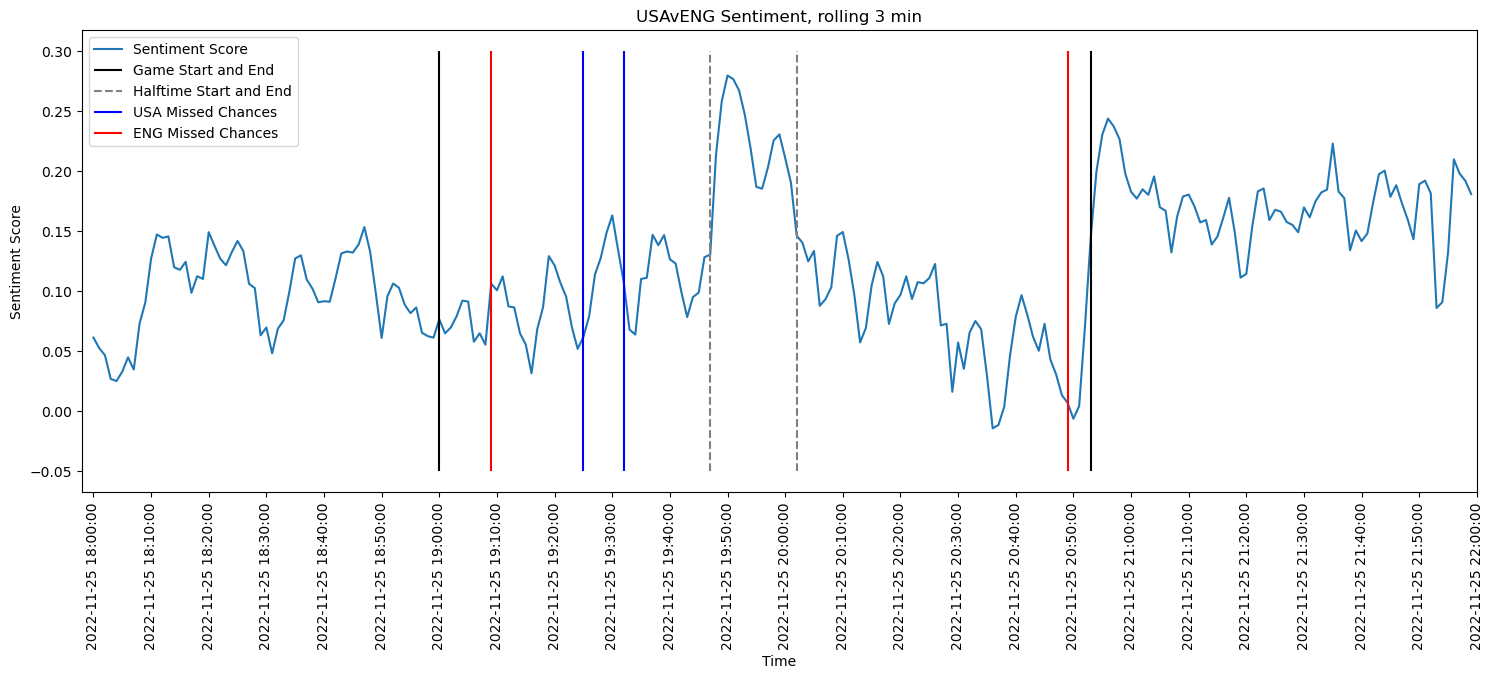

In [19]:
# Replicate visual for 3 minute rolling average
fig, ax = plt.subplots(figsize = (18, 6))

# Calculate the 3 minute rolling average of sentiment score
USAvENG_tweets_rolling_f = USAvENG_tweets.groupby('created_at').agg({'sentiment_compound_polarity_f': 'mean'}).rolling(3).mean()

# Ensure the created_at field is still a datetime after grouping calculations
USAvENG_tweets_rolling_f.index = pd.DatetimeIndex(USAvENG_tweets_rolling_f.index)

# Plot the line chart with ticks every 10 minutes, set axes
USAvENG_tweets_rolling_f.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                                title='USAvENG Sentiment, rolling 3 min', label='Sentiment Score')
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-11-25 18:00', end ='2022-11-25 22:00', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-11-25 18:00', end ='2022-11-25 22:00', freq='10min'), rotation = 90)

# # Plot black lines for the game start and end, dotted lines for halftime, red lines for English missed chances, and blue lines for American missed chances
ax.vlines(x = ['2022-11-25 19:00:00', '2022-11-25 20:53:00'], ymin = -0.05, ymax = 0.3, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-11-25 19:47:00', '2022-11-25 20:02:00'], ymin = -0.05, ymax = 0.3, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = ['2022-11-25 19:25:00', '2022-11-25 19:32:00'], ymin = -0.05, ymax = 0.3, color = 'blue', label = 'USA Missed Chances')
ax.vlines(x = ['2022-11-25 19:09:00', '2022-11-25 20:49:00'], ymin = -0.05, ymax = 0.3, color = 'red', label = 'ENG Missed Chances')
ax.legend();


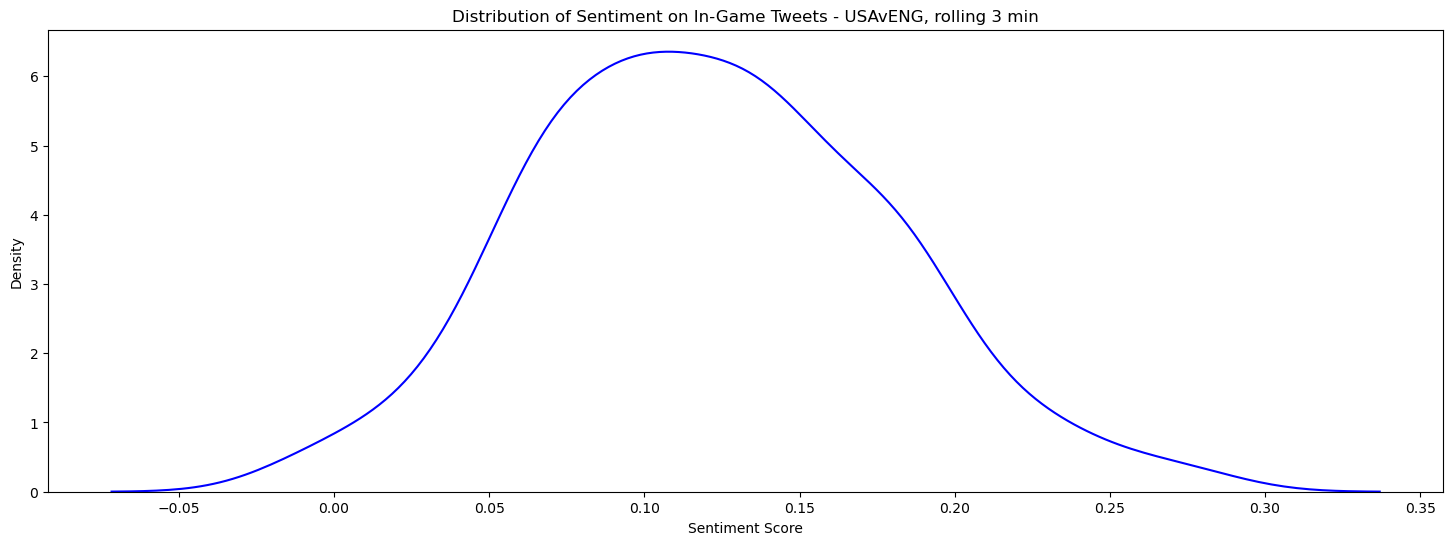

ShapiroResult(statistic=0.9933874607086182, pvalue=0.36745160818099976)

In [20]:
# See distribution of sentiment for rolling 3 minute average
get_dist(USAvENG_tweets_rolling_f['sentiment_compound_polarity_f'][2:], 'USAvENG, rolling 3 min')

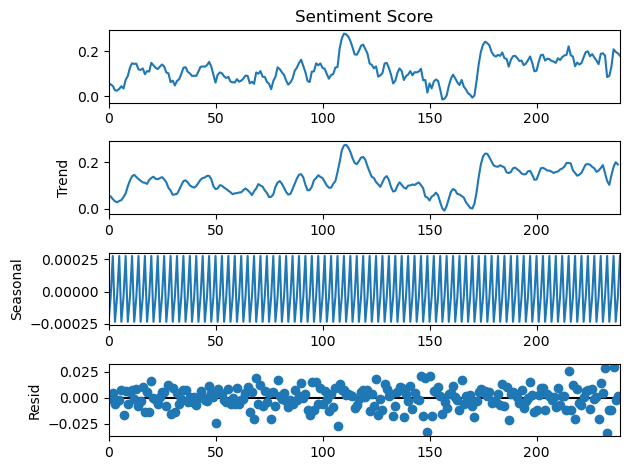

In [21]:
# Analyze time series
# Remove NAs, reset index
ts = USAvENG_tweets_rolling_f['sentiment_compound_polarity_f'][2:]

ts = ts.reset_index(drop=False)

ts.head()

# Additive Model (multiplicative not appropriate)
additive = seasonal_decompose(ts['sentiment_compound_polarity_f'].rename('Sentiment Score'), 
                            model='additive', period=3)
# Plot
additive.plot();

In [22]:
# Create TimeSeriesData object to feed into kats
USAvENG_tweets_rolling = USAvENG_tweets_rolling_f[2:]

data = pd.DataFrame({'time': USAvENG_tweets_rolling.index, 
                    'raw': USAvENG_tweets_rolling['sentiment_compound_polarity_f']})
                    
ts = TimeSeriesData(data)
ts

,time,raw
0,2022-11-25 18:00:00,0.061291
1,2022-11-25 18:01:00,0.052527
2,2022-11-25 18:02:00,0.046525
3,2022-11-25 18:03:00,0.026839
4,2022-11-25 18:04:00,0.025011
...,...,...
235,2022-11-25 21:55:00,0.132280
236,2022-11-25 21:56:00,0.209796
237,2022-11-25 21:57:00,0.197948
238,2022-11-25 21:58:00,0.191852


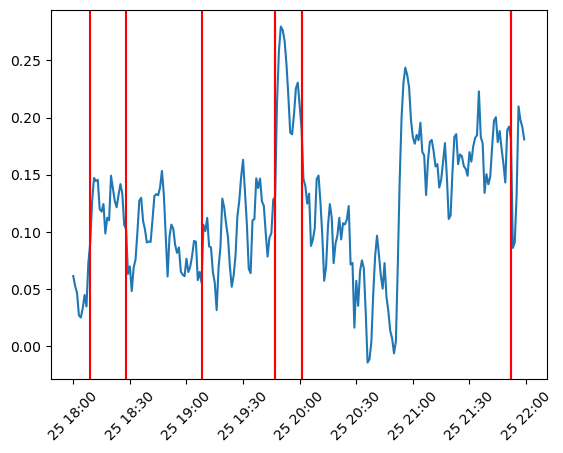

[CUSUMChangePoint(start_time: 2022-11-25 18:09:00, end_time: 2022-11-25 18:09:00, confidence: 0.9999890804601687, direction: increase, index: 7, delta: 0.0942882761518636, regression_detected: True, stable_changepoint: True, mu0: 0.046752692102104684, mu1: 0.14104096825396828, llr: 22.849913457047137, llr_int: 14.560294548171594, p_value: 1.0919539831344416e-05, p_value_int: 0.0006890840719926405),
 CUSUMChangePoint(start_time: 2022-11-25 18:28:00, end_time: 2022-11-25 18:28:00, confidence: 0.9999908938806049, direction: decrease, index: 7, delta: -0.06288224711579048, regression_detected: True, stable_changepoint: True, mu0: 0.12531963137649202, mu1: 0.06243738426070154, llr: 23.213127818891994, llr_int: 12.56444067814282, p_value: 9.106119395085877e-06, p_value_int: 0.0018692456241148347),
 CUSUMChangePoint(start_time: 2022-11-25 19:08:00, end_time: 2022-11-25 19:08:00, confidence: 0.997380379774192, direction: increase, index: 8, delta: 0.03398628162316143, regression_detected: True

In [23]:
# Run Kats for changepoint detection
change_detect(ts, 6, 6, 1, 0.0035)

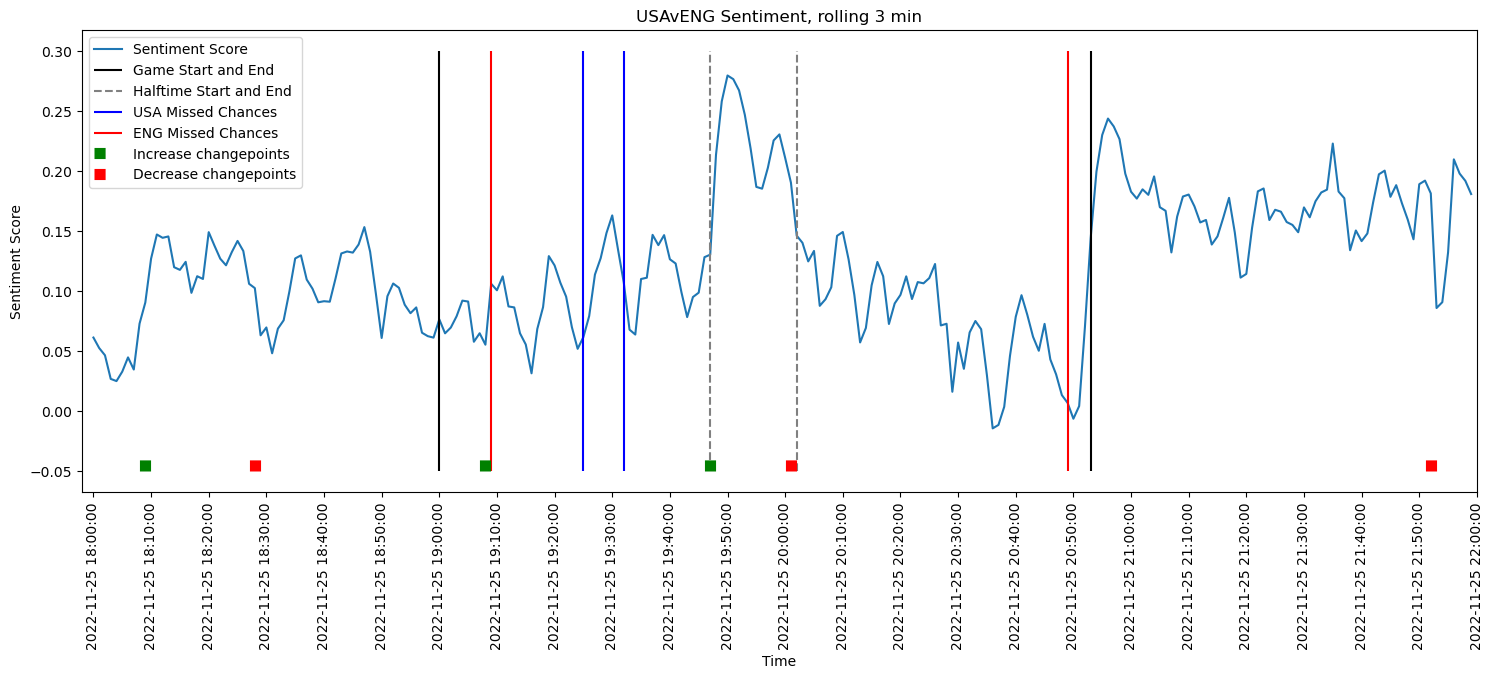

In [24]:
# Add change points to graph
fig, ax = plt.subplots(figsize = (18, 6))

# Ensure the created_at field is still a datetime after grouping calculations
USAvENG_tweets_rolling_f.index = pd.DatetimeIndex(USAvENG_tweets_rolling_f.index)

# Plot the line chart with ticks every 10 minutes, set axes
USAvENG_tweets_rolling_f.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                                    title='USAvENG Sentiment, rolling 3 min', label='Sentiment Score')
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-11-25 18:00', end ='2022-11-25 22:00', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-11-25 18:00', end ='2022-11-25 22:00', freq='10min'), rotation = 90)

# # Plot black lines for the game start and end, dotted lines for halftime, red lines for English missed chances, and blue lines for American missed chances
ax.vlines(x = ['2022-11-25 19:00:00', '2022-11-25 20:53:00'], ymin = -0.05, ymax = 0.3, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-11-25 19:47:00', '2022-11-25 20:02:00'], ymin = -0.05, ymax = 0.3, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = ['2022-11-25 19:25:00', '2022-11-25 19:32:00'], ymin = -0.05, ymax = 0.3, color = 'blue', label = 'USA Missed Chances')
ax.vlines(x = ['2022-11-25 19:09:00', '2022-11-25 20:49:00'], ymin = -0.05, ymax = 0.3, color = 'red', label = 'ENG Missed Chances')

# Add points to see changepoints
ax.vlines(x = ['2022-11-25 18:09:00', '2022-11-25 19:08:00', '2022-11-25 19:47:00'], 
ymin = -0.05, ymax = -0.04, color = 'green', linestyles = 'dotted', linewidth = 8, label = 'Increase changepoints')
ax.vlines(x = ['2022-11-25 18:28:00', '2022-11-25 20:01:00', '2022-11-25 21:52:00'], 
ymin = -0.05, ymax = -0.04, color = 'red', linestyles = 'dotted', linewidth = 8, label = 'Decrease changepoints')

ax.legend();
